In [2]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import norm
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

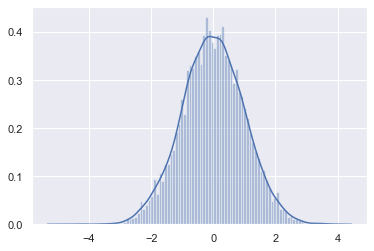

In [2]:
sns.set()
y = np.random.normal(0,1,10000)
y = pd.DataFrame(y)
sns.distplot(y, bins=100) #分布をグラフ化

[(0, 14)]

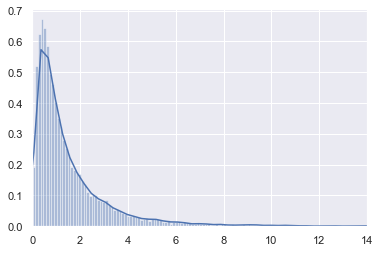

In [3]:
sns.set()
y = np.random.lognormal(0,1,10000)
y = pd.DataFrame(y)
ax = sns.distplot(y, bins=330) #分布をグラフ化
ax.set(xlim=(0,14))

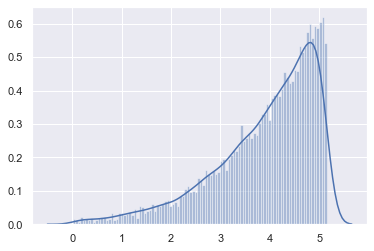

In [4]:
sns.set()
uni = np.random.uniform(0,1,10000) # (0,1)の一様乱数を10,000個生成
x = 100 * (np.exp(uni)-1)+1 #x_iを算出
x = pd.DataFrame(x)

y = np.log(x) #xを対数変換
y = pd.DataFrame(y)
sns.distplot(y, bins=100) #分布をグラフ化

## 分散のみ変化させる正規分布gif画像作成

MovieWriter imagemagick unavailable; using Pillow instead.


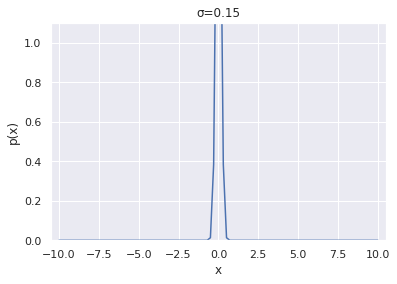

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.stats import norm

sns.set()
sns.set_style('darkgrid')

fig, ax = plt.subplots()

def update(num,x,y,scales,lines):
    if len(lines) > 0:
        lines.pop().remove()
    y_ =norm.pdf(x,loc=0,scale=scales[num])
    line, = ax.plot(x, y_,c="b")
    lines.append(line)
    sig = 'σ='
    ax.set_title(sig + str(scales[num])[:4])

ax.set_xlim(-10.5, 10.5)
ax.set_ylim(0, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')

x = np.linspace(-10,10,100)
y= norm.pdf(x,loc=0,scale=1)
scales = np.linspace(0.05, 5.0, 100)
theta= np.linspace(np.pi/101, 100/101*np.pi, 100)
scales = 5*np.sin(theta)

lines = []

ani = animation.FuncAnimation(fig, update, 100, fargs=(x,y,scales,lines), interval=100)
# HTML(ani.to_html5_video())
dpi=100
ani.save('anim2.gif', writer="imagemagick")
# ani.save('gauss_scale.mp4', writer="ffmpeg",dpi=dpi)